In [1]:
%load_ext autoreload 
%autoreload 2

from pathlib import Path
import logging
import yaml
import json
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from IPython.display import Audio, display

import torch
from torch.utils.data import ConcatDataset, DataLoader
from fusanet_utils.datasets.simulated import SimulatedPoliphonic
from fusanet_utils.datasets.fusa import FUSA_dataset
from fusanet_utils.transforms import Collate_and_transform
from fusanet_utils.augmentations.additive_noise import RedNoise, WhiteNoise, PinkNoise


logger = logging.getLogger()
logger.setLevel(logging.DEBUG)


path = Path('../../experiments/Poliphonic-ADAVANNE-sed/')
params = yaml.safe_load(open(str(path  / 'params.yaml')))
params['features']['overwrite'] = True
model = torch.load(path / 'model.pt')
dataset = SimulatedPoliphonic('../..', mini=False, external=True)
fusa_dataset = FUSA_dataset(ConcatDataset([dataset]), params=params)
print(len(dataset.categories), len(dataset))

/home/redbird/miniconda3/envs/fusa/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


33 100


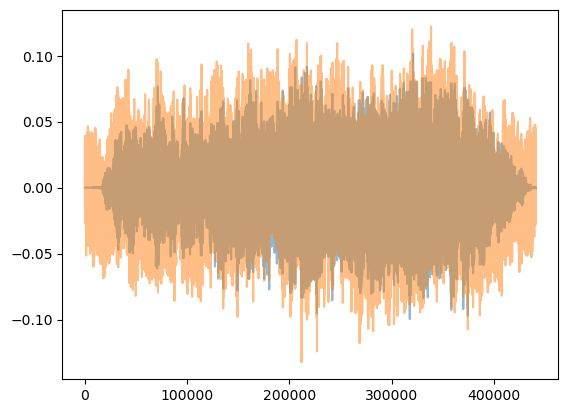

In [6]:
collate_clean = Collate_and_transform(params['features'])
collate_pink = Collate_and_transform(params['features'], transforms=[PinkNoise(snr=0.0)])

fig, ax = plt.subplots()
for my_collate in [collate_clean, collate_pink]:
    loader = DataLoader(fusa_dataset, 
                        shuffle=False, 
                        batch_size=1, 
                        collate_fn=my_collate, 
                        num_workers=1, 
                        pin_memory=False)


    for x in loader:
        #print(x['filename'], x['mel_transform'].shape, x['label'].shape, model(x).shape)
        break
    
    ax.plot(x['waveform'][0][0], alpha=0.5)
    display(Audio(x['waveform'][0][0], rate=32000))